In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, t

np.random.seed(42)
plt.rc({'figsize':(12,6)})
%matplotlib inline

In [239]:
def plot_emp(samples,
             bins,
             pdf,
             df,
             x_range,
             x_label,
             title):
    fig, ax = plt.subplots(1,1)
    ax.hist(samples, 
            bins=bins, 
            density=True,
            align='left',
            label='Histogram')
    ax.plot(x_range, pdf(x_range, df=df), label='Distribution')
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Freq.')
    ax.legend()
    ax.set_xbound(np.min(bins), np.max(bins))

> When $z_i \sim \mathcal{N}(0,1)$, the distribution of $x_n = \sum_{i=1}^{n} z_i^2$ follows the Chi-squared distribution with degree $n$
>$$
     x_n \sim \chi^2_{n}
>$$
> **Important Note - Cochran's theorem:** for $z_1, \dots, z_n$ independent standard normal random samples and $\bar{z} = (1/n) \sum_{i=1}^{n} z_i$, we have
> $$
     \sum_{i=1}^{n} (z_i - \bar{z}) \sim \chi^2_{n-1}.
> $$

In [236]:
np.random.seed(42)
sample_n = 10
ensemble_n = 10000
Zs = np.random.normal(0, 1, (sample_n, ensemble_n))
# Sum the squared Z ~ N(0,1)
samples_chi_2 = (Zs**2).sum(axis=0)

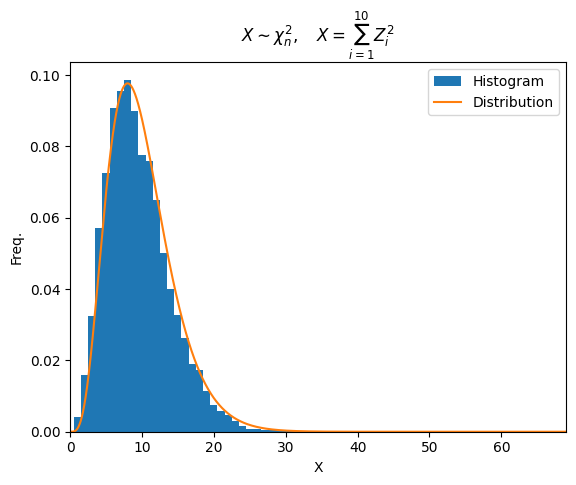

In [240]:
plot_emp(samples_chi_2,
         bins=np.arange(0, sample_n*7, 1),
         pdf=chi2.pdf,
         df=sample_n,
         x_range = np.arange(0, sample_n*7, .01),
         x_label='X',
         title='$X \sim \chi^2_{n}, \quad X=\sum_{i=1}^{' f'{sample_n}' '} Z_i^2$ ')

> Also, the sample standard deviation follows Chi-squared distribution. To derive that, for $x_i \sim \mathcal{N}(\mu, \sigma^2)$ and the unbiased estimates of variance
>$$
  S_n^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2,
>$$
> since 
> $$
    \frac{x_i - \mu}{\sigma} \sim \mathcal{N}(0,1),
> $$
> and when we replace $\mu$ by $\bar{x}$ (**which I do not know why this is justified**) 
> $$
\frac{x_i - \bar{x}}{\sigma} \sim \mathcal{N}(0,1),
> $$
> the quantity
>$$
   V_{n-1} = (n-1) \frac{S_n^2}{\sigma^2 } = \sum_{i=1}^{n} \frac{(x_i - \bar{x})^2}{\sigma^2}
>$$
>follows the Chi-squared distribution degree $n-1$ (the -1 in degree of freedom is the result of average constraint)
>$$
  V_{n-1} \sim \chi^2_{n-1}.
>$$
> To check that, we sample from $\mathcal{N}(\mu=4,\sigma^2=6^2)$, and check the empirical distribution of $V_{n-1}$ statistics on below.

In [241]:
np.random.seed(42)
sample_n = 10
ensemble_n = 10000
mu = 4
sigma = 6
samples = np.random.normal(mu, sigma, (sample_n, ensemble_n))
# The unbiased sample standard error 
samples_sse = samples.std(axis=0, ddof=1)

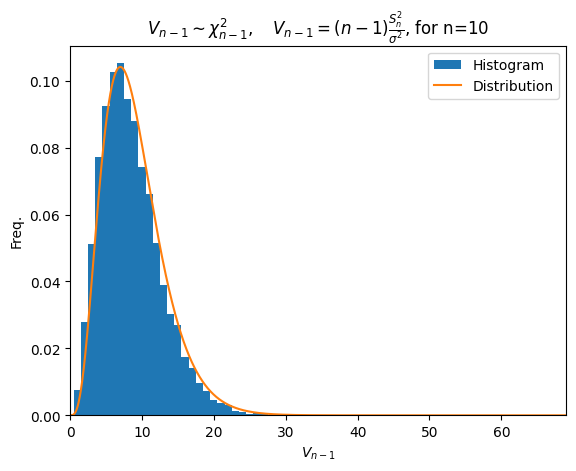

In [242]:
# Calculate V_{n-1}
V_n_1 = (sample_n-1)*(samples_sse/sigma)**2
#
plot_emp(V_n_1,
         bins=np.arange(0, sample_n*7, 1),
         pdf=chi2.pdf,
         df=sample_n-1,
         x_range = np.arange(0, sample_n*7, .01),
         x_label='$V_{n-1}$',
         title=r'$V_{n-1} \sim \chi^2_{n-1}, \quad V_{n-1} = (n-1) \frac{S_n^2}{\sigma^2}$, for ' 
             f'n={sample_n}')

> Finally, for two independent random variables $z \sim \mathcal{N}(0, 1)$ and $V_{n-1} \sim \chi^2_{n-1}$, the quantity
> $$
    T_{n-1} = \frac{z}{\sqrt{\frac{V_{n-1}}{n-1}}}
> $$
> follows t-student distribution with $n-1$ degree of freedom
>$$
    T_{n-1} \sim t(n-1).
>$$
> One application of the above result is for the sample averages which the their true standard deviation of their population is unknown. From CLT,
>$$
     \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} \sim \mathcal{N}(0,1),
>$$
>and the unbiased estimates of the variance is
>$$
  S_n^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2,
>$$
> which follows
>$$
    \frac{S_n^2}{\sigma^2} \sim  \frac{\chi^2_{n-1}}{n-1},
>$$
>and since both statistics are independent, the new statistics
>$$
 T_{n-1} =  \frac{ \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} }{\sqrt{ \frac{\chi^2_{n-1}}{n-1}} } =  \sqrt{n} \frac{ (\bar{x} - \mu)/\sigma }{ S_n/\sigma } = \sqrt{n} \frac{\bar{x} - \mu}{S_n},
>$$
>follows
>$$
    T_{n-1} \sim t(n-1).
>$$
>
> To check that, we sample from $\mathcal{N}(\mu=4,\sigma^2=6^2)$, find the samples means, and check the empirical distribution of $T_{n-1}$ statistics on below.

In [243]:
np.random.seed(42)
sample_n = 10
ensemble_n = 10000
mu = 4
sigma = 6
samples = np.random.normal(mu, sigma, (sample_n, ensemble_n))
# Sample's means
samples_means = samples.mean(axis=0)
# S_n
samples_S = samples.std(axis=0, ddof=1)

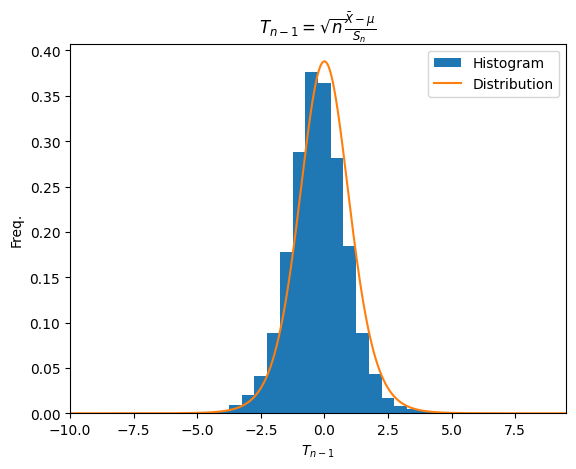

In [245]:
# Calculate T_{n}
T_n = np.sqrt(sample_n) * (samples_means - mu) / samples_S
#
plot_emp(T_n,
         bins=np.arange(-sample_n, sample_n, .5),
         pdf=t.pdf,
         df=sample_n-1,
         x_range = np.arange(-sample_n, sample_n, .01),
         x_label='$T_{n-1}$',
         title=r'$T_{n-1} = \sqrt{n} \frac{\bar{X} - \mu}{S_n}$')